In [1]:
import numpy as np
import scipy.io as sio
import skvideo.io
import skvideo.datasets
import matplotlib.pyplot as plt
import mat73

Load .mat-data and pre-processed video. 

In [2]:
filePath = "C:\\Users\isakb\Documents\Holografidata\TestData\Traces Real\PSL240_noGoldEvery1_1_movie_1.aviCompletedTraces.mat"
vidPath = "C:\\Users\isakb\Documents\Holografidata\TestData\Traces Real\movieFIXED.avi"

expData = mat73.loadmat(filePath)
expData = expData['CompletedTraces']

vid = skvideo.io.vread(vidPath)[:, :, :, 0]

Here we'll specify how our sub-images should look.

In [6]:
subImDim = [64, 64]


Now we'll create the sub-images!

(990, 1924)


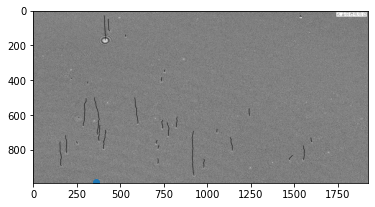

986.4567114450456 361.50503699053695
(990, 1924)


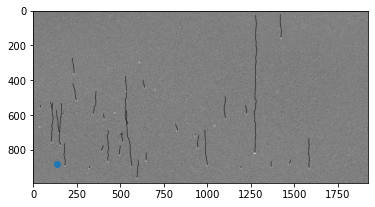

879.7294547710015 134.74527734915654
(990, 1924)


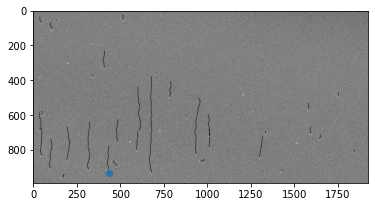

934.9135637925972 433.5540739628731
(990, 1924)


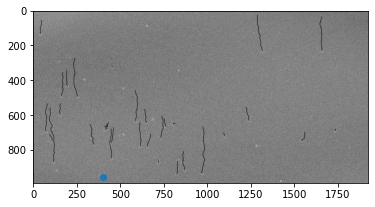

956.0082912370153 400.1522126337845
(990, 1924)


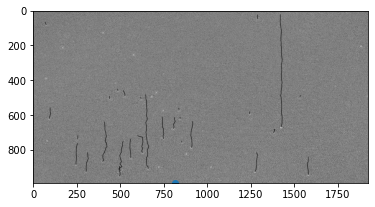

988.9310164643682 813.7755668929696
(990, 1924)


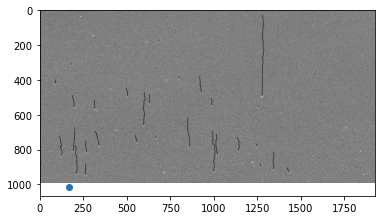

1014.2867802812966 170.2607863790459


In [33]:
szOfValidationSet = 6
randParticle = np.random.randint(0, len(expData), size = szOfValidationSet)

# The following variables are choosen when the video was generated
dx = 0.115
margin = 100
# Something is weird with the recorded video and no frames. It appears the video started at frame 203 in the original video?
for i in randParticle:

    # Access information about particle
    posData = expData[i]['Positions']
    posData = np.array(posData)
    posData = posData[:,0:4]

    # Crop out sub-image (first index could probably be anything up to 10)
    ind = 8
    frame = vid[int(posData[ind, 0] - 203), :, :]

    xCor = posData[ind, 1]/dx - margin
    yCor = posData[ind, 2]/dx - margin

    print(np.shape(frame))
    plt.imshow(frame, cmap = "gray")
    plt.scatter(xCor, yCor)
    plt.show()
    print(yCor, xCor)

    

Daniels kod!! Tar info från ROI och skapar croppad FFT-bild. ROI har bilder på partiklar i fokus!


In [39]:
def exp_expand(data,shape):
    x = np.arange(shape[0]) - shape[0] / 2
    y = np.arange(shape[1]) - shape[1] / 2
    X, Y = np.meshgrid(x, y)
    bg=np.zeros((shape[0]*shape[1],))+0j
    X=np.reshape(np.fft.fftshift(X),(shape[0]*shape[1]))
    Y=np.reshape(np.fft.fftshift(Y),(shape[0]*shape[1]))
    RHO=X**2+Y**2
    Inds=np.argsort(RHO)
    Inds=np.sort(Inds[:data.shape[0]])

    bg[Inds[:data.shape[0]]]=data
    bg=np.reshape(bg,(shape[0],shape[1]))
  
    return bg


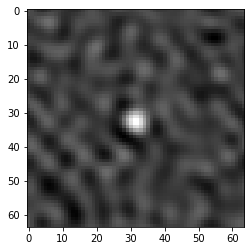

In [61]:
# Can choose either row
roiData = expData[200]['ROI'][0][4]
roiData = np.array(roiData)

shape = [64, 64]

fftOfParticle = exp_expand(roiData, shape)
particleROI = np.fft.ifft2(fftOfParticle)
particleROI = np.fft.fftshift(particleROI)

plt.imshow(np.imag(particleROI), cmap = "gray")